NAME : SANJAY T
REG NO: 212222110039

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

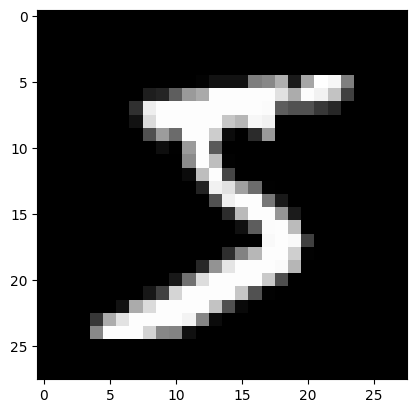

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

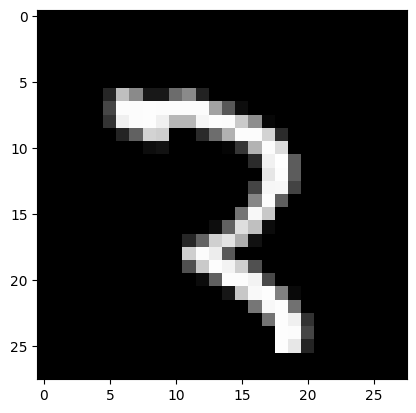

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')),
model.add(layers.Flatten()),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386026 (5.29 MB)
Trainable params: 1386026 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.1622 - accuracy: 0.9522 - val_loss: 0.0702 - val_accuracy: 0.9791
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0593 - val_accuracy: 0.9800
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0602 - val_accuracy: 0.9812
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0503 - val_accuracy: 0.9840
Epoch 5/5
938/938 [==============================] - 36s 39ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0576 - val_accuracy: 0.9813


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.162194,0.952217,0.070223,0.9791
1,0.051179,0.983850,0.059261,0.9800
2,0.027591,0.991517,0.060175,0.9812
3,0.017409,0.994750,0.050301,0.9840
4,0.011779,0.996150,0.057625,0.9813


<Axes: >

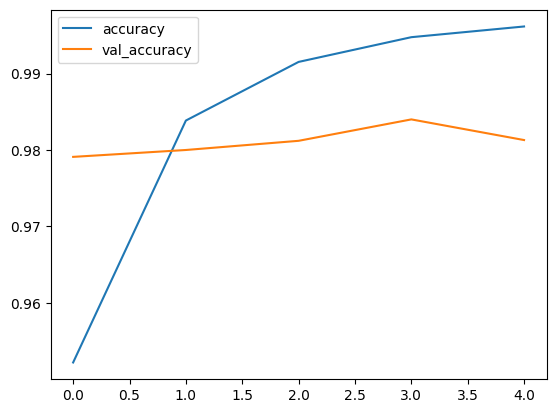

In [27]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

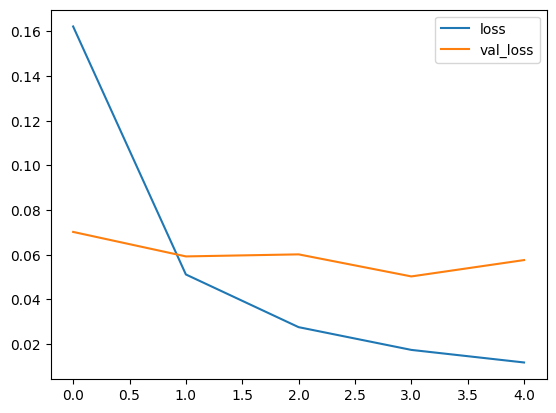

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [30]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 975    0    2    0    0    0    1    1    1    0]
 [   0 1127    5    0    0    0    2    0    1    0]
 [   8    1 1008    1    1    0    0    3    9    1]
 [   0    0    5  993    0    5    0    2    2    3]
 [   1    0    1    0  972    0    2    0    1    5]
 [   3    0    1    8    0  864    6    0    3    7]
 [   7    2    2    0    3    4  939    0    1    0]
 [   1    1    9    2    2    0    0  999    3   11]
 [   4    0    4    3    3    1    2    2  950    5]
 [   4    4    0    2    9    1    0    0    3  986]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
img = image.load_img('deepimage.jpeg')

In [33]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [34]:
img = image.load_img('deepimage.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [35]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 74ms/step


In [36]:
print(x_single_prediction)


[3]


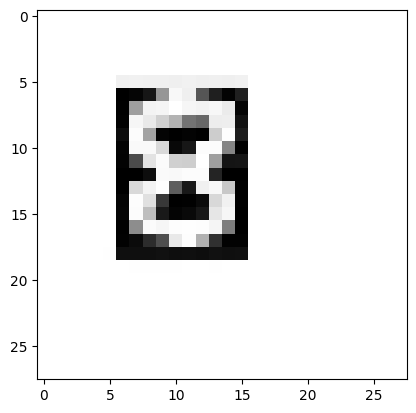

In [37]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [38]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 34ms/step


In [40]:
print(x_single_prediction)


[9]
